In [1]:
import numpy as np
import pandas as pd
import PyQt5
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [95]:
df = pd.read_csv('./Historical data/NIFTY BANK_Data.csv')

In [96]:
df.drop(['Unnamed: 5'], axis=1, inplace = True)

In [97]:
df.head()

,Date,Open,High,Low,Close,OpenToHigh%,OpenToLow%,OpenToClose%,OpenToHigh,OpenToLow,OpenToClose
0,29-Mar-23,39611.55,40055.0,39609.55,39910.15,1.119497,-0.005049,0.753821,443.45,-2.00,298.60
1,28-Mar-23,39545.05,39645.2,39326.10,39567.90,0.253255,-0.553672,0.057782,100.15,-218.95,22.85
2,27-Mar-23,39484.70,39695.2,39273.75,39431.30,0.533118,-0.534258,-0.135242,210.50,-210.95,-53.40
3,24-Mar-23,39555.25,39767.9,39294.90,39395.35,0.537602,-0.658193,-0.404245,212.65,-260.35,-159.90
4,23-Mar-23,39836.15,40201.6,39552.50,39616.90,0.917383,-0.712042,-0.550379,365.45,-283.65,-219.25


In [98]:
Date_new = []
dict = {"Jan": "01", "Feb": "02", "Mar": "03", "Apr": "04", "May": "05", "Jun": "06", "Jul": "07", "Aug": "08", "Sep":"09", "Oct": "10", "Nov": "11", "Dec": "12"}

for date in df["Date"]:
    boop = date.split("-")
    boom = "20"+boop[2]+dict[boop[1]]+boop[0]
    Date_new.append(boom)

df["Date"] = Date_new


In [99]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')

In [100]:
df.insert(1, "Day", df['Date'].dt.dayofweek, True)

In [101]:
df[df['Date'].dt.year == 2022]

,Date,Day,Open,High,Low,Close,OpenToHigh%,OpenToLow%,OpenToClose%,OpenToHigh,OpenToLow,OpenToClose
61,2022-12-30,4,43401.70,43422.95,42833.10,42986.45,0.048961,-1.310087,-0.956760,21.25,-568.60,-415.25
62,2022-12-29,3,42684.90,43498.05,42489.80,43252.35,1.905006,-0.457070,1.329393,813.15,-195.10,567.45
63,2022-12-28,2,42733.60,43034.95,42694.85,42827.70,0.705183,-0.090678,0.220201,301.35,-38.75,94.10
64,2022-12-27,1,42827.75,42927.20,42394.15,42859.50,0.232209,-1.012428,0.074134,99.45,-433.60,31.75
65,2022-12-26,0,41716.35,42846.15,41569.45,42630.15,2.708291,-0.352140,2.190508,1129.80,-146.90,913.80
...,...,...,...,...,...,...,...,...,...,...,...,...
304,2022-01-07,4,37667.05,38134.85,37427.80,37739.60,1.241934,-0.635171,0.192609,467.80,-239.25,72.55
305,2022-01-06,3,37242.55,37752.50,37058.45,37490.25,1.369267,-0.494327,0.665099,509.95,-184.10,247.70
306,2022-01-05,2,36943.55,37862.40,36756.35,37695.90,2.487173,-0.506719,2.036485,918.85,-187.20,752.35
307,2022-01-04,1,36551.25,36887.80,36374.40,36840.15,0.920762,-0.483841,0.790397,336.55,-176.85,288.90


In [102]:
df.head()

,Date,Day,Open,High,Low,Close,OpenToHigh%,OpenToLow%,OpenToClose%,OpenToHigh,OpenToLow,OpenToClose
0,2023-03-29,2,39611.55,40055.0,39609.55,39910.15,1.119497,-0.005049,0.753821,443.45,-2.00,298.60
1,2023-03-28,1,39545.05,39645.2,39326.10,39567.90,0.253255,-0.553672,0.057782,100.15,-218.95,22.85
2,2023-03-27,0,39484.70,39695.2,39273.75,39431.30,0.533118,-0.534258,-0.135242,210.50,-210.95,-53.40
3,2023-03-24,4,39555.25,39767.9,39294.90,39395.35,0.537602,-0.658193,-0.404245,212.65,-260.35,-159.90
4,2023-03-23,3,39836.15,40201.6,39552.50,39616.90,0.917383,-0.712042,-0.550379,365.45,-283.65,-219.25


## 2023 Volatility

[Text(0, 0, '8'),
 Text(0, 0, '36'),
 Text(0, 0, '92'),
 Text(0, 0, '325'),
 Text(0, 0, '1030'),
 Text(0, 0, '1132'),
 Text(0, 0, '272'),
 Text(0, 0, '73'),
 Text(0, 0, '22'),
 Text(0, 0, '3')]

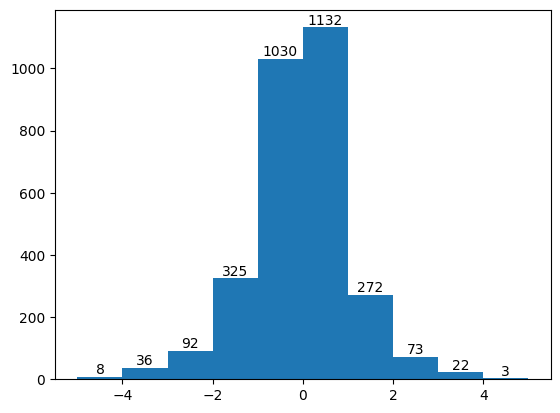

In [9]:
bin_size = 1; min_edge = -5; max_edge = 5
N = int((max_edge-min_edge)/bin_size); Nplus1 = N + 1
bin_list = np.linspace(min_edge, max_edge, Nplus1)
counts, edges, bars = plt.hist(df["OpenToHigh%"].tolist()+df["OpenToLow%"].tolist(), bins = bin_list)

plt.bar_label(bars)

In [16]:
df2 = df[df["Date"].dt.year == 2023]

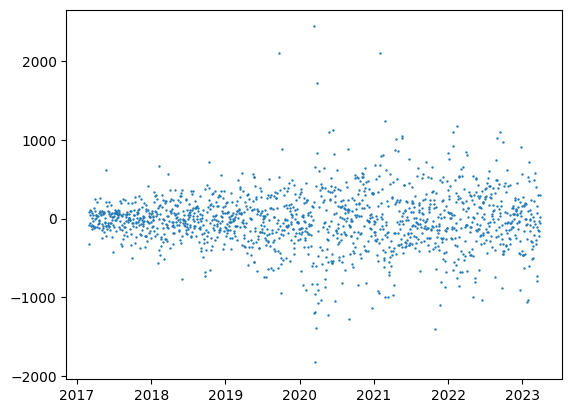

In [17]:
plt.scatter(df["Date"].tolist(), df["OpenToClose"].tolist(), s = 0.5)

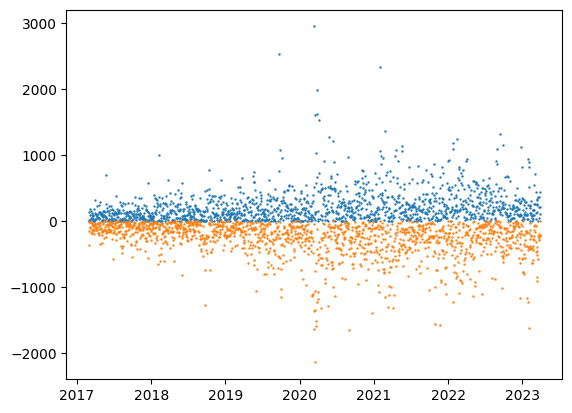

In [18]:
plt.scatter(df["Date"].tolist(), df["OpenToHigh"].tolist(), s = 0.5)
plt.scatter(df["Date"].tolist(), df["OpenToLow"].tolist(), s = 0.5)

In [20]:
up["Low"]-up["Open"]

0      -2.00
1    -218.95
6    -233.35
8    -515.60
9    -448.55
15    -78.00
17    -66.05
19   -131.90
21    -75.00
23   -383.45
29   -219.00
30   -214.70
32    -27.50
37   -409.60
38   -181.90
40   -396.15
41   -436.35
48   -152.15
51   -285.65
53   -342.85
55   -218.30
59     -3.00
60    -76.50
dtype: float64

In [25]:
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y":True}]])

fig.add_trace(go.Candlestick(x = df["Date"],
open = df["Open"]-df["Open"],
high = df["High"]-df["Open"],
low = df["Low"]-df["Open"],
close = df["Close"]-df["Open"]))
fig.show()


### Ranges on Mondays

In [126]:
a = df[df["Date"].dt.year >= 2022]
mon = a[a["Day"]==0]
tue = a[a["Day"]==1]
wed = a[a["Day"]==2]
thur = a[a["Day"]==3]
fri = a[a["Day"]==4]
sat = a[a["Day"]==5]
sun = a[a["Day"]==6]

In [127]:
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y":True}]])

fig.add_trace(go.Candlestick(x = thur["Date"],
open = thur["Open"]-thur["Open"],
high = thur["High"]-thur["Open"],
low = thur["Low"]-thur["Open"],
close = thur["Close"]-thur["Open"]))
fig.show()

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '4'),
 Text(0, 0, '16'),
 Text(0, 0, '40')]

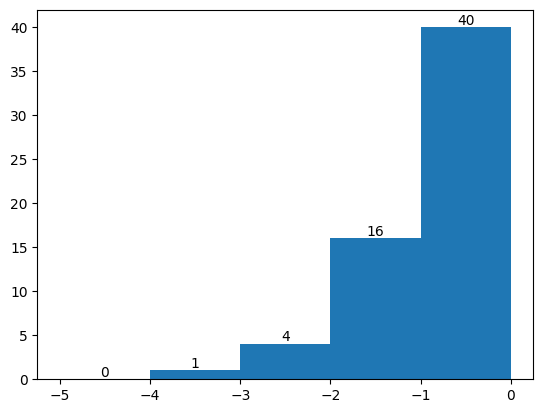

In [78]:
counts, edges, bars = plt.hist(a["OpenToLow%"], bins = [-5, -4, -3, -2, -1, 0])

plt.bar_label(bars)

[Text(0, 0, '176'),
 Text(0, 0, '54'),
 Text(0, 0, '14'),
 Text(0, 0, '4'),
 Text(0, 0, '0')]

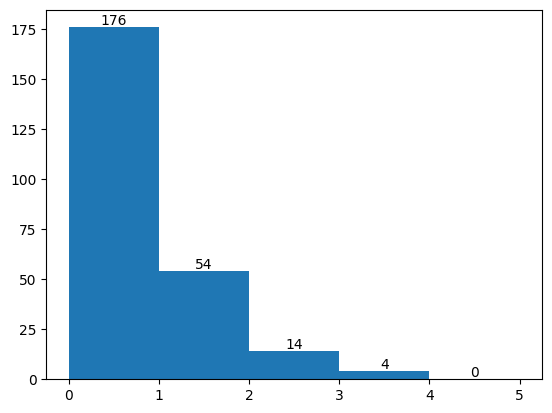

In [33]:
counts, edges, bars = plt.hist(a["OpenToHigh%"], bins = [0, 1 ,2 ,3, 4, 5])

plt.bar_label(bars)

### Mondays 2022

In [79]:
np.mean(mon["OpenToHigh"])

270.01153846153846

[Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0')]

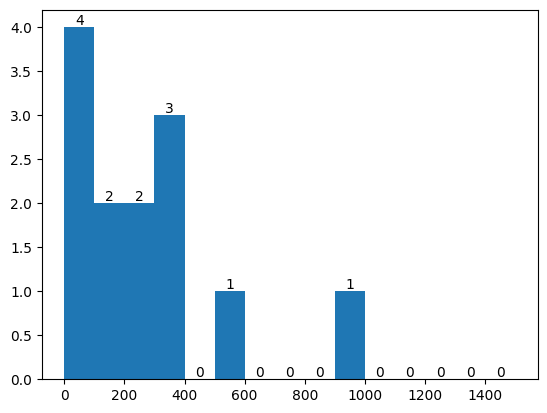

In [80]:
counts, edges, bars = plt.hist(mon["OpenToHigh"], bins=range(0, 1500 + 100, 100))

plt.bar_label(bars)

In [81]:
np.mean(mon["OpenToLow"])

-360.28846153846155

[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '2')]

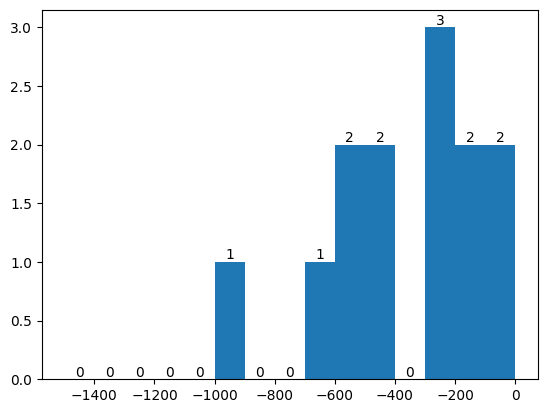

In [82]:
counts, edges, bars = plt.hist(mon["OpenToLow"], bins=range(-1500, 0 + 100, 100))

plt.bar_label(bars)

### Tuesday 2022

In [83]:
np.mean(tue["OpenToHigh"])

185.93333333333337

[Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0')]

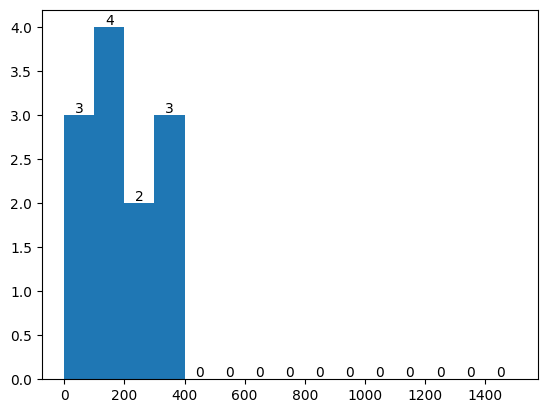

In [84]:
counts, edges, bars = plt.hist(tue["OpenToHigh"], bins=range(0, 1500 + 100, 100))

plt.bar_label(bars)

In [85]:
np.mean(tue["OpenToLow"])

-328.7875

[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '0'),
 Text(0, 0, '1')]

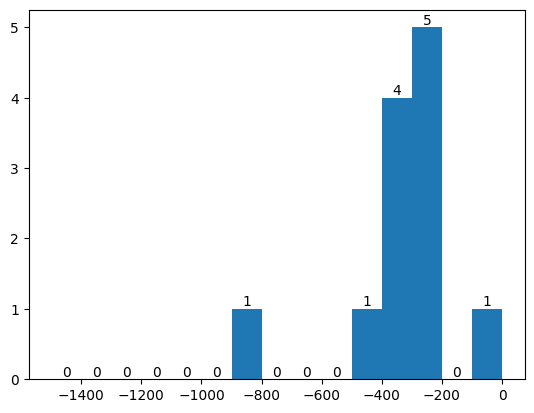

In [86]:
counts, edges, bars = plt.hist(tue["OpenToLow"], bins=range(-1500, 0 + 100, 100))

plt.bar_label(bars)

### Wednesday 2022

In [87]:
np.mean(wed["OpenToHigh"])

258.06538461538463

[Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0')]

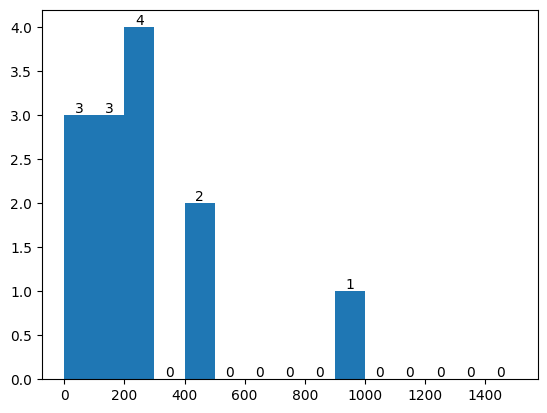

In [88]:
counts, edges, bars = plt.hist(wed["OpenToHigh"], bins=range(0, 1500 + 100, 100))

plt.bar_label(bars)

In [89]:
np.mean(wed["OpenToLow"])

-465.24230769230775

[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '4'),
 Text(0, 0, '2')]

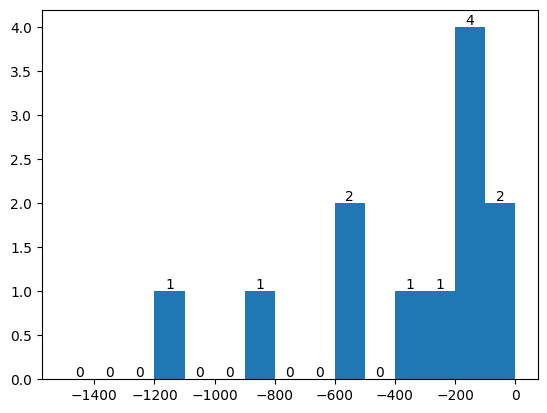

In [90]:
counts, edges, bars = plt.hist(wed["OpenToLow"], bins=range(-1500, 0 + 100, 100))

plt.bar_label(bars)

In [113]:
a = df[df["Date"].dt.year == 2023]

thur = a[a["Day"]==3]


### Thursday 2022

In [114]:
np.mean(thur["OpenToHigh"])

206.49090909090907

[Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '0'),
 Text(0, 0, '2'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0')]

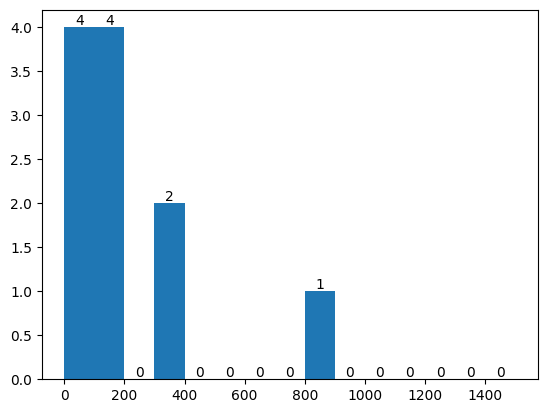

In [115]:
counts, edges, bars = plt.hist(thur["OpenToHigh"], bins=range(0, 1500 + 100, 100))

plt.bar_label(bars)

In [118]:
np.mean(thur["OpenToLow"])

-377.26818181818186

[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '0')]

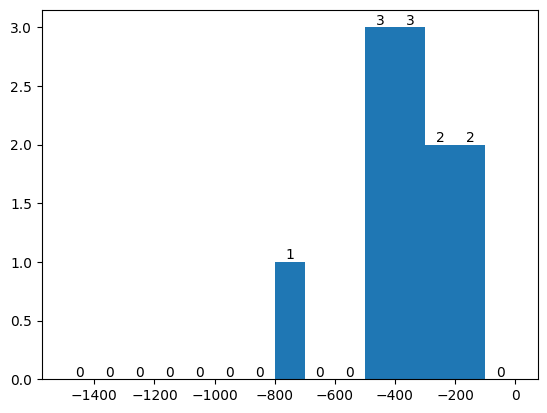

In [119]:
counts, edges, bars = plt.hist(thur["OpenToLow"], bins=range(-1500, 0 + 100, 100))

plt.bar_label(bars)

### Friday 2022

In [47]:
np.mean(fri["OpenToHigh"])

271.475

[Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '11'),
 Text(0, 0, '2'),
 Text(0, 0, '4'),
 Text(0, 0, '4'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0')]

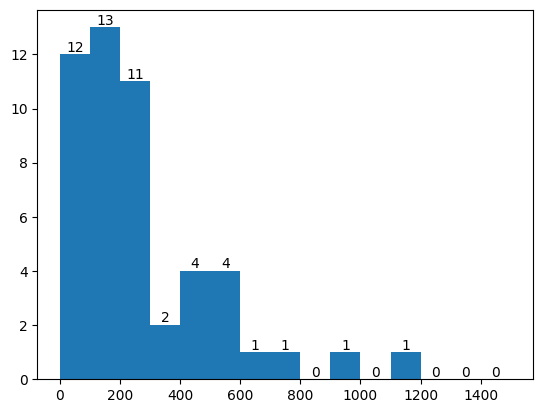

In [68]:
counts, edges, bars = plt.hist(fri["OpenToHigh"], bins=range(0, 1500 + 100, 100))

plt.bar_label(bars)

In [48]:
np.mean(fri["OpenToLow"])

-319.71000000000004

[Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '17'),
 Text(0, 0, '6'),
 Text(0, 0, '8')]

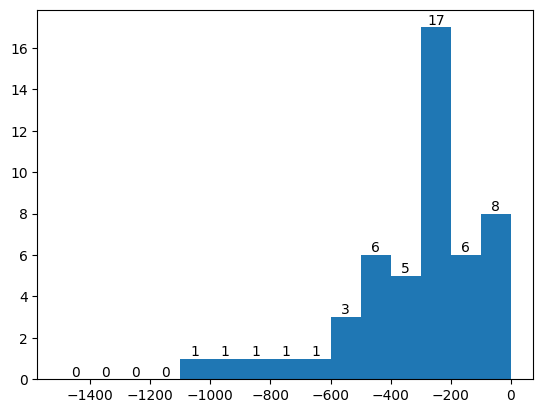

In [69]:
counts, edges, bars = plt.hist(fri["OpenToLow"], bins=range(-1500, 0 + 100, 100))

plt.bar_label(bars)

In [74]:
fig = make_subplots(specs=[[{"secondary_y":True}]])

fig.add_trace(go.Candlestick(x = mon["Date"],
open = mon["Open"]-mon["Open"],
high = mon["High"]-mon["Open"],
low = mon["Low"]-mon["Open"],
close = mon["Close"]-mon["Open"]))
fig.show()

In [75]:
fig = make_subplots(specs=[[{"secondary_y":True}]])

fig.add_trace(go.Candlestick(x = tue["Date"],
open = tue["Open"]-tue["Open"],
high = tue["High"]-tue["Open"],
low = tue["Low"]-tue["Open"],
close = tue["Close"]-tue["Open"]))
fig.show()

In [76]:
fig = make_subplots(specs=[[{"secondary_y":True}]])

fig.add_trace(go.Candlestick(x = wed["Date"],
open = wed["Open"]-wed["Open"],
high = wed["High"]-wed["Open"],
low = wed["Low"]-wed["Open"],
close = wed["Close"]-wed["Open"]))
fig.show()